# <center>Final Project; Algorithms in Modern Statistics </center>
### Submitted by: 
**<center>Full Name: Matan Mizrachi</center>**

The following project is fully based on the data, that could be found and explained [here](https://www.kaggle.com/aibuzz/audio-classification-predict-the-emotions).

FFmpeg installation guide in this [link](https://www.wikihow.com/Install-FFmpeg-on-Windows).

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
import librosa
from librosa import display
from scipy import signal, stats

sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

from tqdm.notebook import tqdm
tqdm.pandas()

Useful functions:

In [4]:
def load_file(f: str, train=True, max_len=2e+5):
    path = 'AudioFiles'
    # fp = '../input/audio-classification-predict-the-emotions/dataset'
    fp = 'dataset'
    max_len = int(max_len)
    if train:
        path = '/Train' + path
    else:
        path = '/Test' + path
        
    path = fp + path*3 + '/' + f
    if f.split('.')[1].lower() == 'wav': 
        audio = librosa.load(path)[0]
    
    f = os.getcwd() + '/' + f.split('.')[0] + '.wav'
    f = f.replace(f[2], '/')
    call = f'ffmpeg -i {path} {f}'
    os.system(call)
    audio = librosa.load(f)[0]
    
    os.remove(f)
    
    n = len(audio)
    if n < max_len:
        audio = np.append(audio, np.zeros(max_len - n))
    
    elif n > max_len:
        audio = audio[:max_len]
        
    return audio

def load_all_data(from_existing=True, _df=None):
    if from_existing:
        if os.path.isfile('dataset/new_df.npy'):
            return np.load('dataset/new_df.npy')
        
    if type(_df) != pd.Series:
        return None
    _df = np.array(_df.apply(load_file).to_list()).astype('float16')
    np.save('dataset/new_df.npy', _df)
    return _df
    
    

In [5]:
# train_data = pd.read_csv('../input/audio-classification-predict-the-emotions/dataset/train.csv')
train_data = pd.read_csv('dataset/train.csv')
sr = 22050
train_data.head(5)

,filename,emotion
0,18777.mp3,neutral
1,24041.mp3,neutral
2,1621.mp3,joy
3,28883.mp3,neutral
4,14918.mp3,neutral


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5816 entries, 0 to 5815
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  5816 non-null   object
 1   emotion   5816 non-null   object
dtypes: object(2)
memory usage: 91.0+ KB


In [7]:
%%time
y = train_data['emotion']
X = load_all_data(_df=train_data['filename'])

Wall time: 2.58 s


## Part 1; EDA

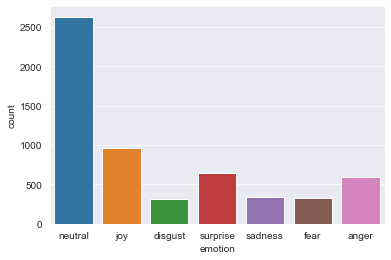

In [8]:
sns.countplot(y)
plt.show()

In [ ]:
signal.stft(X, fs=1/sr)[2]